Question 2: Introduction to Regularization with Ridge Regression<br>
Task: Use Ridge regression on a noisy dataset and evaluate improvements over simple linear
regression due to regularization.

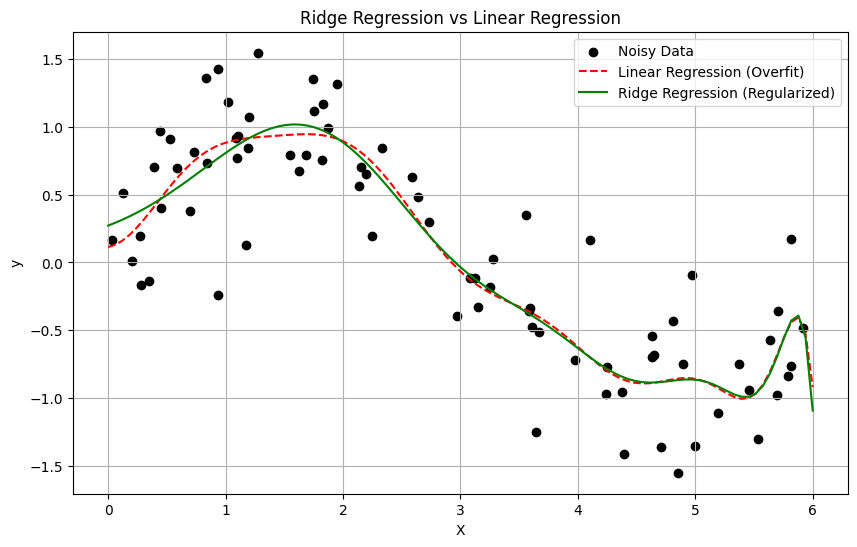

Train MSE (Linear Regression): 0.136
Train MSE (Ridge Regression): 0.139


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Step 1: Generate Noisy Non-linear Data
np.random.seed(42)
X = np.sort(6 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.4, X.shape[0])  # sine wave + noise

# Step 2: Use a high-degree polynomial to induce overfitting
degree = 15

# Linear Regression Model (overfits)
poly_linear = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_linear.fit(X, y)

# Ridge Regression Model (regularized)
alpha = 1.0  # Regularization strength
poly_ridge = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=alpha))
poly_ridge.fit(X, y)

# Step 3: Predict for visualization
X_test = np.linspace(0, 6, 100).reshape(-1, 1)
y_pred_linear = poly_linear.predict(X_test)
y_pred_ridge = poly_ridge.predict(X_test)

# Step 4: Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='black', label="Noisy Data")
plt.plot(X_test, y_pred_linear, color='red', linestyle='--', label="Linear Regression (Overfit)")
plt.plot(X_test, y_pred_ridge, color='green', label="Ridge Regression (Regularized)")
plt.title("Ridge Regression vs Linear Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

# Step 5: Quantitative Comparison
y_train_pred_linear = poly_linear.predict(X)
y_train_pred_ridge = poly_ridge.predict(X)

mse_linear = mean_squared_error(y, y_train_pred_linear)
mse_ridge = mean_squared_error(y, y_train_pred_ridge)

print(f"Train MSE (Linear Regression): {mse_linear:.3f}")
print(f"Train MSE (Ridge Regression): {mse_ridge:.3f}")
